In [20]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import re
import codecs
import gensim
import multiprocessing
from gensim.models import Word2Vec

/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin.gz
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/blend-of-lstm-and-cnn-with-4-embeddings-1200d/__results__.html
/kaggle/input/blend-of-lstm-and-cnn-with-4-embeddings-1200d/submission.csv
/kaggle/input/blend-of-lstm-and-cnn-with-4-embeddings-1200d/__output__.json
/kaggle/input/blend-of-lstm-and-cnn-with-4-embeddings-1200d/custom.css


# 2. Dùng thư viện sklearn, chạy lại với các dataset dưới, nhận xét khi thay đổi perplexity, https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


circles, perplexity=5 in 0.17 sec
circles, perplexity=30 in 0.33 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


circles, perplexity=50 in 0.38 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


circles, perplexity=100 in 0.35 sec
S-curve, perplexity=5 in 0.16 sec
S-curve, perplexity=30 in 0.33 sec
S-curve, perplexity=50 in 0.37 sec
S-curve, perplexity=100 in 0.35 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


uniform grid, perplexity=5 in 0.21 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


uniform grid, perplexity=30 in 0.37 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


uniform grid, perplexity=50 in 0.4 sec


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


uniform grid, perplexity=100 in 0.42 sec


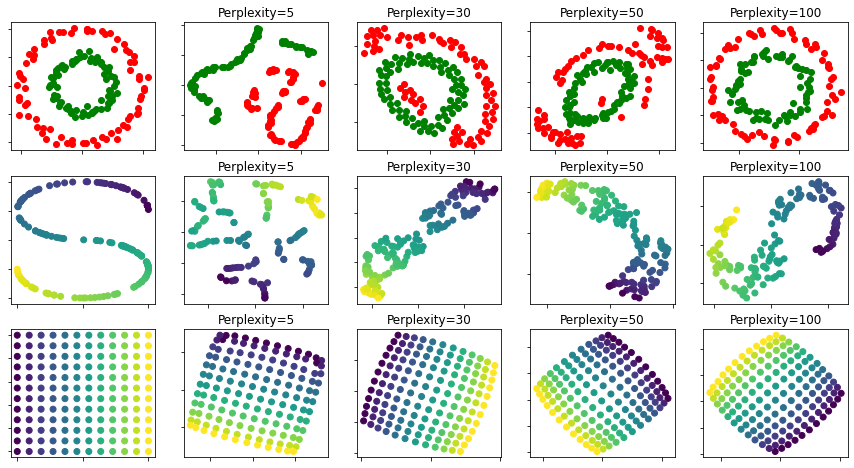

In [21]:
n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        n_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")
    
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        n_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()

Perplexity is defined as

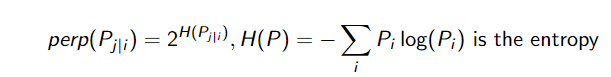

If P is uniform over k elements - perplexity is k. Low perplexity = low σ whereas high perplexity = high σ and σ sets the size of the neighborhood:

- When Perplexity = 5, σ is very low, all probability is in the nearest neighborbood. On the graph, all points closet to each other belongs to the same neighborhood.

- When Perplexity = 30 and 50, σ is higher, a large neighborhood's local structure is preserve and the shape resembles original data.

- When Perplexity = 100, σ is very low, for all the circle data, the shape is similar to the original data, but the distance between points and circle's size vary. On the s-curve, the shapes diverge from the original.

# 3. Dùng word embedding (https://habr.com/en/company/vk/blog/449984/), chọn ra 10 từ bất kì, với mỗi từ tìm 10 từ có embedding gần nhất

a. nhận xét về ngữ nghĩa các từ có embedding gần nhau

b. dùng t-SNE giảm chiều các vector embedding về 2 chiều, nhận xét các cụm

In [12]:
model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin', binary=True)

In [13]:
def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [14]:
keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [15]:
word_clusters

[['Parisian',
  'Hopital_Europeen_Georges_Pompidou',
  'Spyker_D##_Peking',
  'France',
  'Pantheon_Sorbonne',
  'Aeroports_De',
  'Grigny_south',
  'Place_Denfert_Rochereau',
  'guest_Olivier_Dolige',
  'Lazard_Freres_Banque',
  'Pitié_Salpêtrière_Hospital',
  'Le_Meridien_Etoile',
  'Nanterre_west',
  'Colombes',
  'Créteil',
  'Christian_Châtelet',
  'Melun',
  'Garches_west',
  'French',
  'Avignon',
  'Cergy_Pontoise',
  'Saint_Ouen',
  'Vandore_reported',
  'Ivry_sur_Seine',
  'Brussels',
  'Suresnes_west',
  'Elysées',
  'By_PETA_Protester',
  'Trappes',
  'Issy_les_Moulineaux'],
 ['Jython',
  'Perl_Python',
  'IronPython',
  'scripting_languages',
  'PHP_Perl',
  'Java_Python',
  'PHP',
  'Python_Ruby',
  'Visual_Basic',
  'Perl',
  'LISP',
  'scripting_language',
  'XSLT',
  'TurboGears',
  'PHP_Hypertext_Preprocessor',
  'VB6',
  'PHP_Ruby',
  'ExtJS',
  'glibc',
  'Qt',
  'Clojure',
  'Rubinius',
  'Perl_PHP_Python',
  'Gnome',
  'NET_CLR',
  'Smalltalk',
  'EJB3',
  'Perl_s

**a. nhận xét về ngữ nghĩa các từ có embedding gần nhau**

Closely embedded words are:

- Words in different forms (goose and geese, duck and ducks, return and returned or returns)

- Words that contains the original word (Jython and Perl_Python, dishwasher and Bosch_dishwasher, man and woman),

- Words that are different writing (return and Return, duck and Duck) 

- words that are close in meaning (fair and reasonable or equitable) 

- Words that are  related character or events (Steve Jason is a singer, Paris is the capital of France)

In [16]:
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


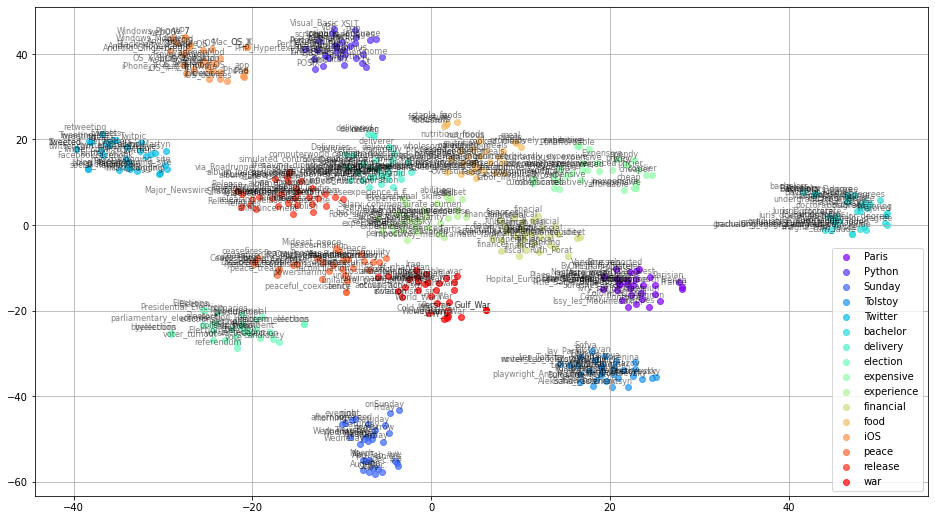

In [19]:
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)

**b. dùng t-SNE giảm chiều các vector embedding về 2 chiều, nhận xét các cụm**

- Clusters classify quite well: bachelor, Sunday, election, Python, IOS. There's a bit of a lump in the middle.
- All embeded words make up quite clear clusters, quite close to each other.